In [1]:
#importing libraries
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_log_error

In [2]:
#reading the csv file
df = pd.read_csv('train.csv')
df.head()

,Customer_ID,No_of_orders_placed,Category_of_customers,Maximum_bill,Minimum_bill,Last_order_placed_date,No_of_issues_raised,Customer_rating,Average_food_rating,Average_happiness_rating,Coupon_consumption_status,Coupons_offered,Premium_membership,Discount_percentage
0,CUS0x4c0d,99.0,Inactive,1549.05,79.00,05/31/2015 08:40 PM,NaN,3.0,4.0,3,99.0,119,No,33.0
1,CUS0x7d45,5.0,Inactive,3682.21,124.69,06/29/2015 11:15 PM,5.0,4.0,4.0,4,5.0,18,No,31.0
2,CUS0x68c1,181.0,Inactive,729.08,297.79,04/29/2016 06:43 AM,44.0,4.0,3.0,4,152.0,245,No,43.0
3,CUS0x1c6e,196.0,Passive,1558.58,102.92,10/18/2019 02:47 PM,49.0,4.0,3.0,3,85.0,302,No,41.0
4,CUS0x286f,211.0,Active,1260.48,291.54,11/13/2020 12:57 PM,43.0,4.0,3.0,4,120.0,306,No,48.0


In [3]:
#checking the number of missing values and data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19978 entries, 0 to 19977
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_ID                19978 non-null  object 
 1   No_of_orders_placed        18266 non-null  float64
 2   Category_of_customers      18858 non-null  object 
 3   Maximum_bill               19855 non-null  float64
 4   Minimum_bill               19978 non-null  float64
 5   Last_order_placed_date     16887 non-null  object 
 6   No_of_issues_raised        18323 non-null  float64
 7   Customer_rating            17826 non-null  float64
 8   Average_food_rating        19738 non-null  float64
 9   Average_happiness_rating   19978 non-null  int64  
 10  Coupon_consumption_status  19749 non-null  float64
 11  Coupons_offered            19978 non-null  int64  
 12  Premium_membership         19978 non-null  object 
 13  Discount_percentage        19738 non-null  flo

### Handling Missing values

In [4]:
#checking for the unique values in customer_ID
df.Customer_ID.nunique()

19978

In [5]:
#Checking for the discount given to people where order no is missing
df[['No_of_orders_placed','Discount_percentage']].tail()


#filling the nan in No_of_orders_placed with 1 as the person must have ordered atleast once.
#this was deduced as there are no missing values in Minimum_bill
df['No_of_orders_placed'] = df['No_of_orders_placed'].fillna(1)

In [6]:
df[ 'Category_of_customers'].unique()

array(['Inactive', 'Passive', 'Active', nan, '0'], dtype=object)

In [7]:
df['Category_of_customers'] =df['Category_of_customers'].fillna('Inactive')
df['Category_of_customers'] =df['Category_of_customers'].replace('0', 'Inactive')

In [8]:
#filling nan in Last_order_placed_date with the last date in the dataset
df['Last_order_placed_date']= pd.to_datetime(df['Last_order_placed_date'])
df['Last_order_placed_date'].max()

Timestamp('2021-02-28 20:35:00')

In [9]:
df['Last_order_placed_date']= df['Last_order_placed_date'].fillna('2021-02-28 20:35:00')

In [10]:
#filling nan in No_of_issues_raised with 0 assuming no complaint was raised by these people
df['No_of_issues_raised'] = df['No_of_issues_raised'].fillna(0)

In [11]:
#Filling mean value for Maximum_bill, Customer_rating, Average_food_rating, Average_happiness_rating, Coupon_consumption_status
df[['Maximum_bill','Customer_rating', 'Average_food_rating', 'Average_happiness_rating', 'Coupon_consumption_status']] = df[['Maximum_bill','Customer_rating', 'Average_food_rating', 'Average_happiness_rating', 'Coupon_consumption_status']].fillna(df[['Maximum_bill','Customer_rating', 'Average_food_rating', 'Average_happiness_rating', 'Coupon_consumption_status']].mean())

In [12]:
#checking the values in Premium_membership
df.Premium_membership.unique()

array(['No', '0', 'Yes'], dtype=object)

In [13]:
#changing the values to two categories
df['Premium_membership'].replace('0','No', inplace=True)

In [14]:
#Assuming nan in Discount_percentage means no discount was given
df['Discount_percentage'] = df['Discount_percentage'].fillna(0)

In [15]:
df['Discount_percentage'] = df['Discount_percentage'].abs()

### Transformation

In [16]:
#converting categories into numerical labels
label_encoder = LabelEncoder()

# Encode labels in column 'Premium_membership'.
df['Premium_membership']= label_encoder.fit_transform(df['Premium_membership'])
df['Category_of_customers']= label_encoder.fit_transform(df['Category_of_customers'])


### Finding correlation between the features


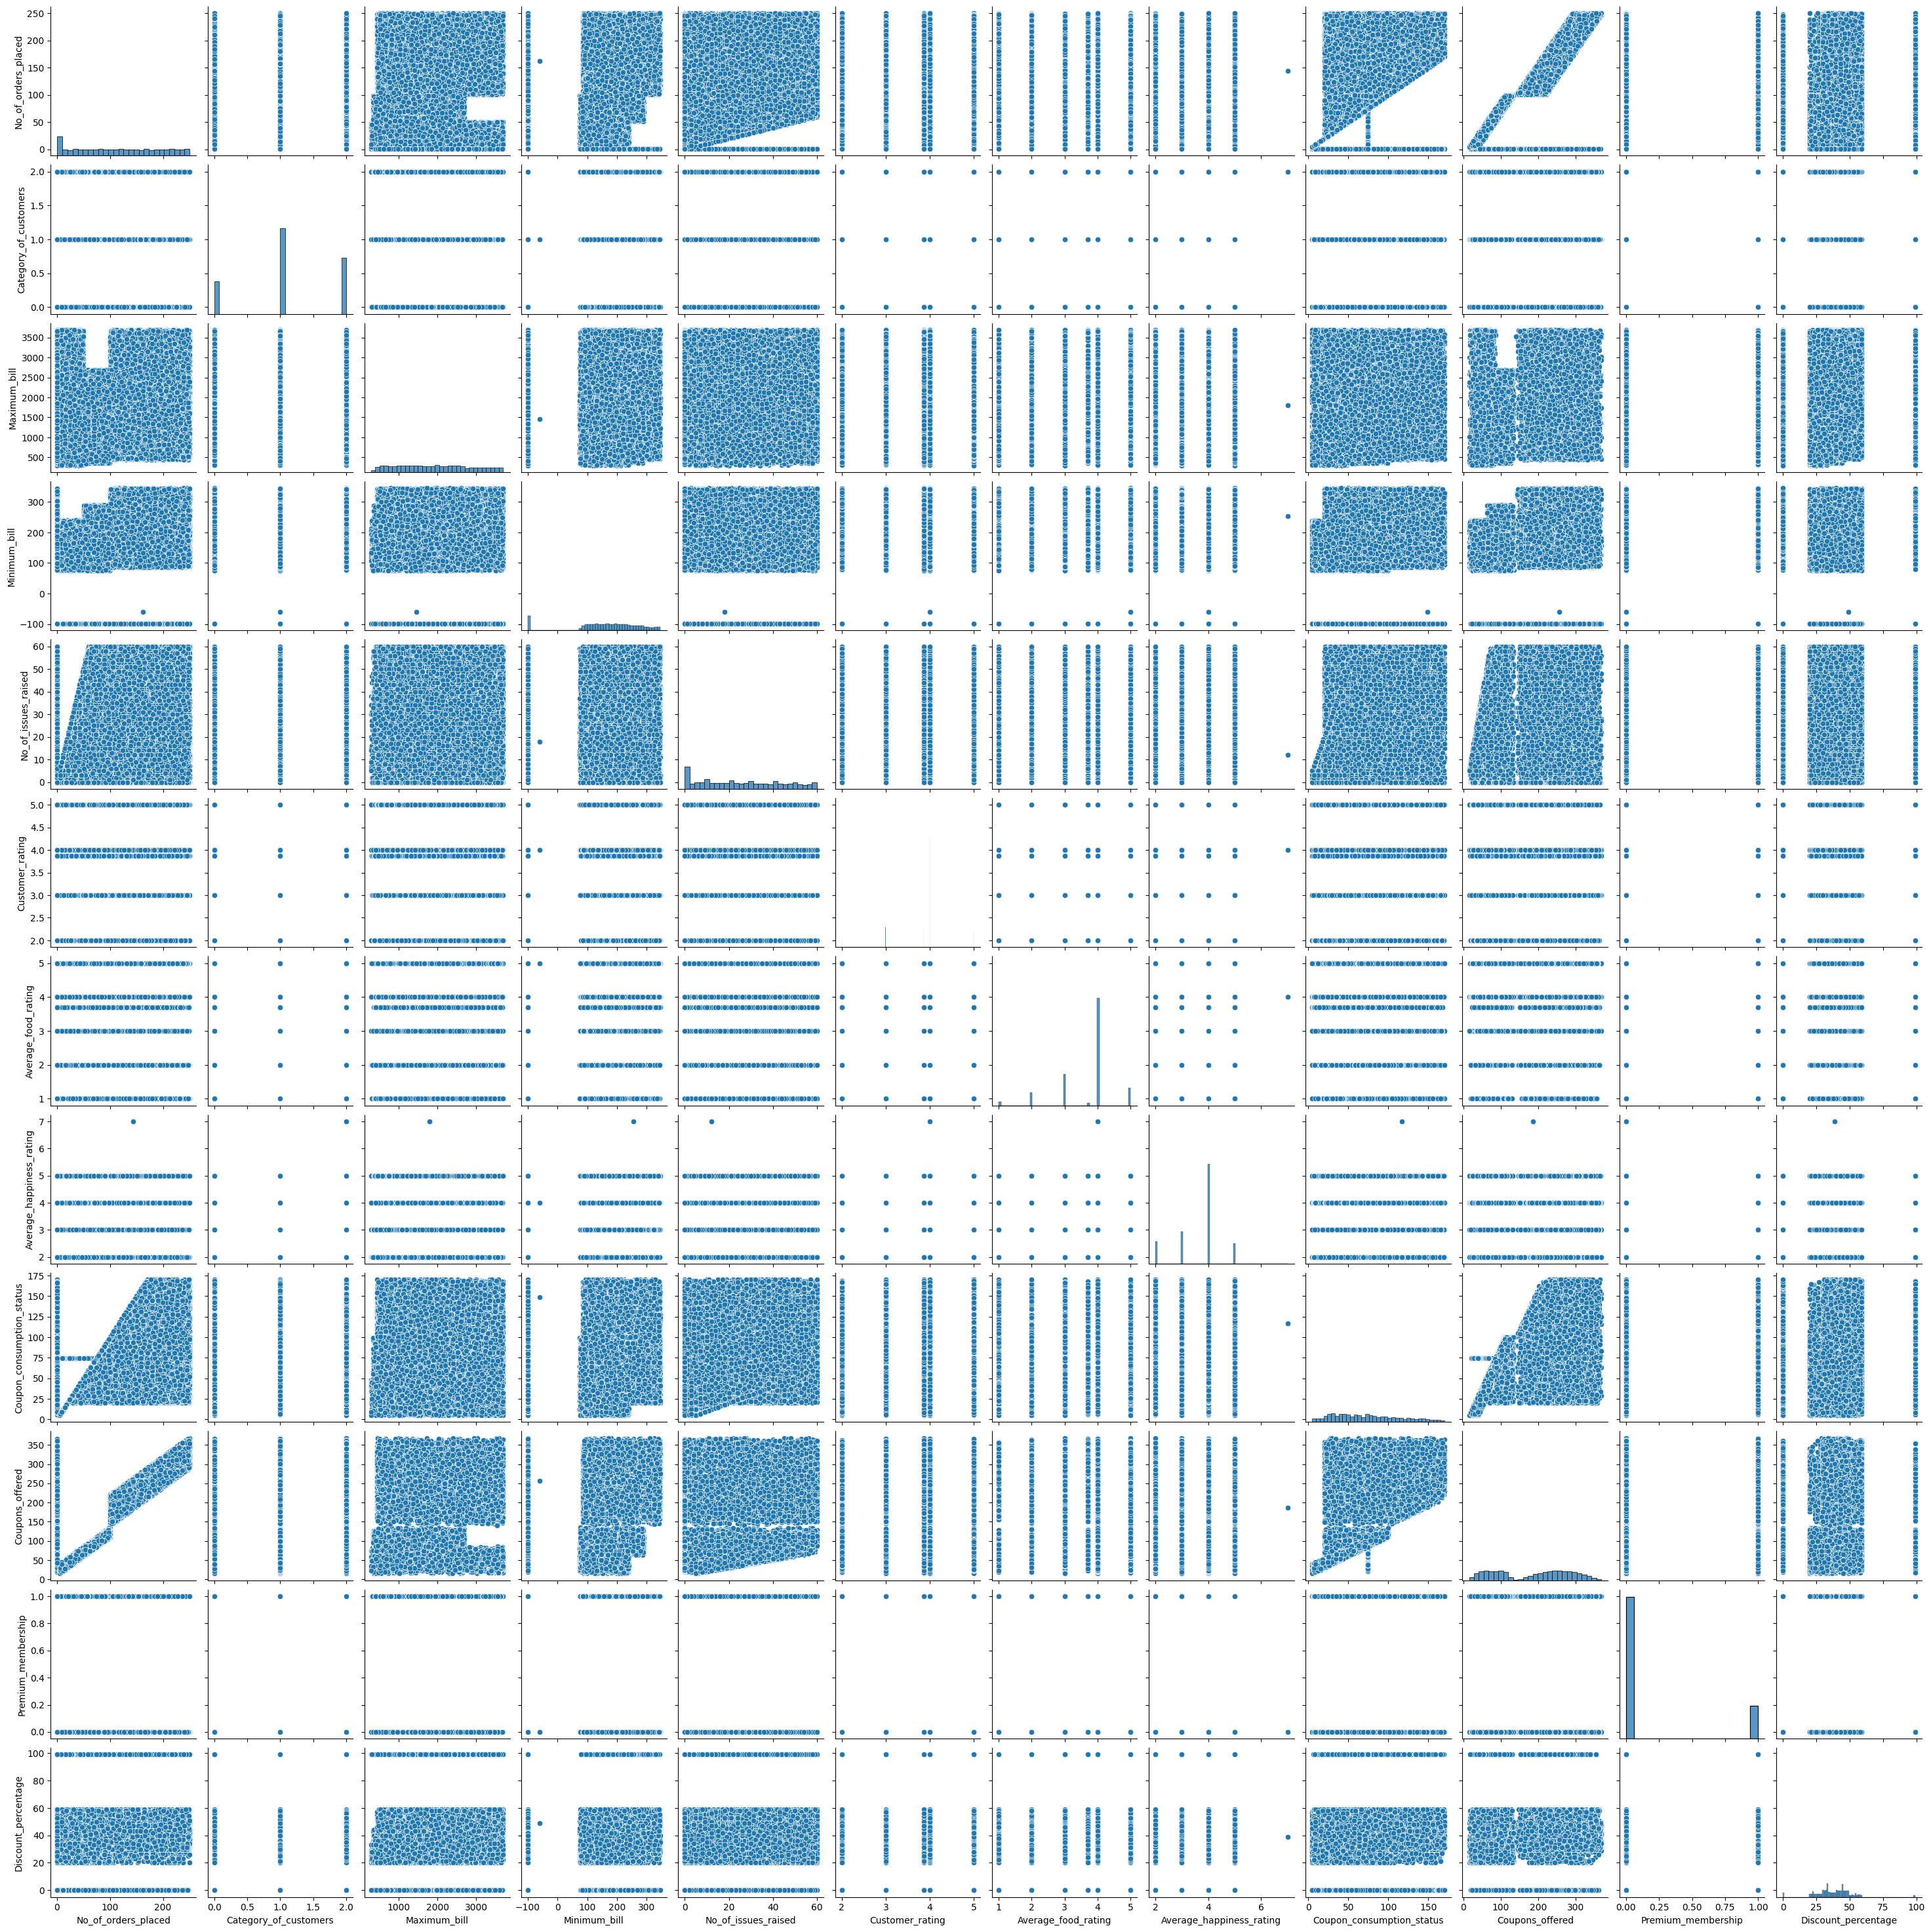

In [17]:
# pairplot with hue day
seaborn.pairplot(df)
# to show
plt.show()

### Train validation split

In [18]:
X = df.drop(['Customer_ID', 'Last_order_placed_date','Discount_percentage'],axis=1 )
y = df['Discount_percentage']

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=2)

In [20]:
X_train.shape

(14983, 11)

In [21]:
X_valid.shape

(4995, 11)

### Machine Learning

####Multiple Linear Regression

In [22]:
def eval(actual,predicted):
  score = 100 * max(0, 1 - mean_squared_log_error(actual,predicted))
  return score

In [23]:
regressor1 = LinearRegression()
#train
regressor1 .fit(X_train, y_train)

#predict
pred1= regressor1.predict(X_valid)
pred1

array([45.20683389, 34.35400695, 35.97983377, ..., 41.11872654,
       37.85064348, 39.69704052])

In [24]:
#Evaluate
score1 = eval( y_valid, pred1)

In [25]:
score1

64.52679593188908

In [26]:
x_poly = PolynomialFeatures(2)

x_p= x_poly.fit_transform(X_train)
x_valid_p =x_poly.transform(X_valid)

regressor2 = LinearRegression()
#train
regressor2 .fit(x_p, y_train)

#predict
pred2= regressor2.predict(x_valid_p)

score2 = eval( y_valid, pred2)
score2

65.9677625789918

In [27]:
###DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# create a regressor object

regressor3 = DecisionTreeRegressor(random_state = 0)


# fit the regressor with X and Y data
regressor3.fit(X_train, y_train)

#predict
pred3= regressor3.predict(X_valid)


score3 = eval( y_valid, pred3)
score3

24.390938210869628

In [28]:
###RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor4 = RandomForestRegressor(n_estimators=100,
                                  random_state=0)

# fit the regressor with X and Y data
regressor4.fit(X_train, y_train)

#predict
pred4= regressor4.predict(X_valid)


score4 = eval( y_valid, pred4)
score4

66.90137379265197

### Test File

In [29]:
X_test = pd.read_csv('test.csv')

In [30]:
customer_id = X_test['Customer_ID']

In [31]:
X_test = X_test.drop(['Customer_ID', 'Last_order_placed_date'],axis=1 )

In [32]:
X_test['No_of_orders_placed'] = X_test['No_of_orders_placed'].fillna(1)
X_test['Category_of_customers'] =X_test['Category_of_customers'].fillna('Inactive')
X_test['Category_of_customers'] =X_test['Category_of_customers'].replace('0', 'Inactive')
X_test['No_of_issues_raised'] = X_test['No_of_issues_raised'].fillna(0)
X_test[['Maximum_bill','Customer_rating', 'Average_food_rating', 'Average_happiness_rating', 'Coupon_consumption_status']] = X_test[['Maximum_bill','Customer_rating', 'Average_food_rating', 'Average_happiness_rating', 'Coupon_consumption_status']].fillna(X_test[['Maximum_bill','Customer_rating', 'Average_food_rating', 'Average_happiness_rating', 'Coupon_consumption_status']].mean())
X_test['Premium_membership'].replace('0','No', inplace=True)

In [33]:
X_test['Premium_membership']= label_encoder.fit_transform(X_test['Premium_membership'])
X_test['Category_of_customers']= label_encoder.fit_transform(X_test['Category_of_customers'])


In [34]:
#x_test_p =x_poly.transform(X_test). #polynomial regression

In [39]:
#test_result = regressor2.predict(x_test_p)
test_result = regressor1.predict(X_test)

In [40]:
sub = pd.DataFrame({'Customer_ID' : customer_id, 'Discount_percentage': test_result})
sub.head()

,Customer_ID,Discount_percentage
0,CUS0xfce,34.996780
1,CUS0x52e0,42.174545
2,CUS0x439c,36.274494
3,CUS0x7cdc,37.875304
4,CUS0x59eb,37.705235


In [41]:
sub.to_csv('submission_file.csv')